##Importing all the libraries

In [13]:
from sklearn.preprocessing import OneHotEncoder
from flask import Flask, render_template, request
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [14]:
def posix_time(dt):
    return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)



#importing the dataset




In [15]:
data = pd.read_csv('Train.csv')

#taking the required features or columns
Collecting the data


In [16]:
data = data.sort_values(
    by=['date_time'], ascending=True).reset_index(drop=True)
last_n_hours = [1, 2, 3, 4, 5, 6]
for n in last_n_hours:
    data[f'last_{n}_hour_traffic'] = data['traffic_volume'].shift(n)
data = data.dropna().reset_index(drop=True)
data.loc[data['is_holiday'] != 'None', 'is_holiday'] = 1
data.loc[data['is_holiday'] == 'None', 'is_holiday'] = 0
data['is_holiday'] = data['is_holiday'].astype(int)

data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].map(lambda x: int(x.strftime("%H")))
data['month_day'] = data['date_time'].map(lambda x: int(x.strftime("%d")))
data['weekday'] = data['date_time'].map(lambda x: x.weekday()+1)
data['month'] = data['date_time'].map(lambda x: int(x.strftime("%m")))
data['year'] = data['date_time'].map(lambda x: int(x.strftime("%Y")))
data.to_csv("traffic_volume_data.csv", index=None)

In [17]:
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
data = pd.read_csv("traffic_volume_data.csv")
data = data.sample(10000, replace=True).reset_index(drop=True)
label_columns = ['weather_type', 'weather_description']
numeric_columns = ['is_holiday', 'temperature',
                       'weekday', 'hour', 'month_day', 'year', 'month']

In [18]:
features = numeric_columns+label_columns
X = data[features]
X.head()

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,288.12,1,0,12,2012,11,Clear,sky is clear
1,1,270.62,1,0,2,2017,1,Snow,light snow
2,1,264.40,2,0,25,2012,12,Clouds,overcast clouds
3,1,258.96,1,0,18,2013,2,Clouds,few clouds
4,1,250.14,3,0,1,2014,1,Clouds,overcast clouds


In [19]:
X.shape


(10000, 9)

In [20]:
from functools import reduce
def unique(list1):
    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    print(ans)

n1 = data['weather_type']
n2 = data['weather_description']
unique(n1)
unique(n2)
n1features = ['Rain', 'Clouds', 'Clear', 'Snow', 'Mist',
              'Drizzle', 'Haze', 'Thunderstorm', 'Fog', 'Smoke', 'Squall']
n2features = ['light rain', 'few clouds', 'Sky is Clear', 'light snow', 'sky is clear', 'mist', 'broken clouds', 'moderate rain', 'drizzle', 'overcast clouds', 'scattered clouds', 'haze', 'proximity thunderstorm', 'light intensity drizzle', 'heavy snow', 'heavy intensity rain', 'fog', 'heavy intensity drizzle', 'shower snow', 'snow', 'thunderstorm with rain',
              'thunderstorm with heavy rain', 'thunderstorm with light rain', 'proximity thunderstorm with rain', 'thunderstorm with drizzle', 'smoke', 'thunderstorm', 'proximity shower rain', 'very heavy rain', 'proximity thunderstorm with drizzle', 'light rain and snow', 'light intensity shower rain', 'SQUALLS', 'shower drizzle', 'thunderstorm with light drizzle']
"""#Data Preparation"""

n11 = []
n22 = []
for i in range(10000):
    if(n1[i]) not in n1features:
        n11.append(0)
    else:
        n11.append((n1features.index(n1[i]))+1)
    if n2[i] not in n2features:
        n22.append(0)
    else:
        n22.append((n2features.index(n2[i]))+1)
# print(n11)
# print(n22)
data['weather_type'] = n11
data['weather_description'] = n22


['Clear', 'Snow', 'Clouds', 'Rain', 'Mist', 'Haze', 'Thunderstorm']
['sky is clear', 'light snow', 'overcast clouds', 'few clouds', 'moderate rain', 'light rain', 'mist', 'broken clouds', 'Sky is Clear', 'haze', 'scattered clouds', 'proximity thunderstorm']


#Data Preparation

In [21]:
features = numeric_columns+label_columns
target = ['traffic_volume']
X = data[features]
y = data[target]

In [22]:
X.head(6)

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,288.12,1,0,12,2012,11,3,5
1,1,270.62,1,0,2,2017,1,4,4
2,1,264.40,2,0,25,2012,12,2,10
3,1,258.96,1,0,18,2013,2,2,2
4,1,250.14,3,0,1,2014,1,2,10
5,1,258.96,1,0,18,2013,2,2,2


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


[[<Axes: title={'center': 'is_holiday'}>
  <Axes: title={'center': 'temperature'}>
  <Axes: title={'center': 'weekday'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'month_day'}>
  <Axes: title={'center': 'year'}>]
 [<Axes: title={'center': 'month'}>
  <Axes: title={'center': 'weather_type'}>
  <Axes: title={'center': 'weather_description'}>]]


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

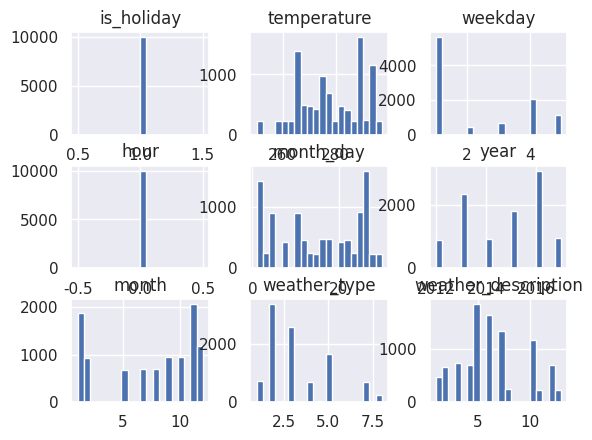

In [23]:
print(data[features].hist(bins=20,))

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

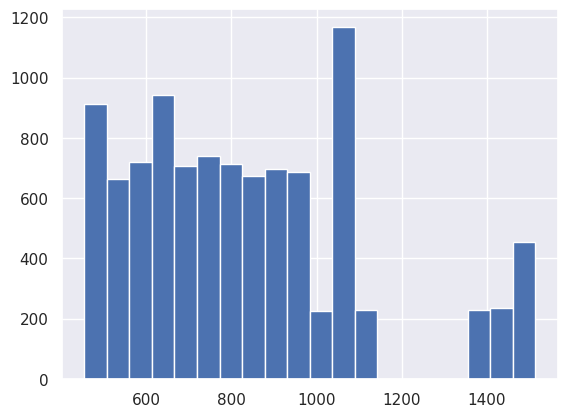

In [24]:
data['traffic_volume'].hist(bins=20)

#Feature Scaling

In [25]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y).flatten()
warnings.filterwarnings('ignore')

In [26]:
import joblib

joblib.dump(x_scaler, 'x_scaler.pkl')
joblib.dump(y_scaler, 'y_scaler.pkl')


['y_scaler.pkl']

In [27]:
print(X[:5])

[[0.         0.80329949 0.         0.         0.37931034 0.
  0.90909091 0.28571429 0.33333333]
 [0.         0.43316413 0.         0.         0.03448276 1.
  0.         0.42857143 0.25      ]
 [0.         0.30160745 0.25       0.         0.82758621 0.
  1.         0.14285714 0.75      ]
 [0.         0.18654822 0.         0.         0.5862069  0.2
  0.09090909 0.14285714 0.08333333]
 [0.         0.         0.5        0.         0.         0.4
  0.         0.14285714 0.75      ]]


#Visualization

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

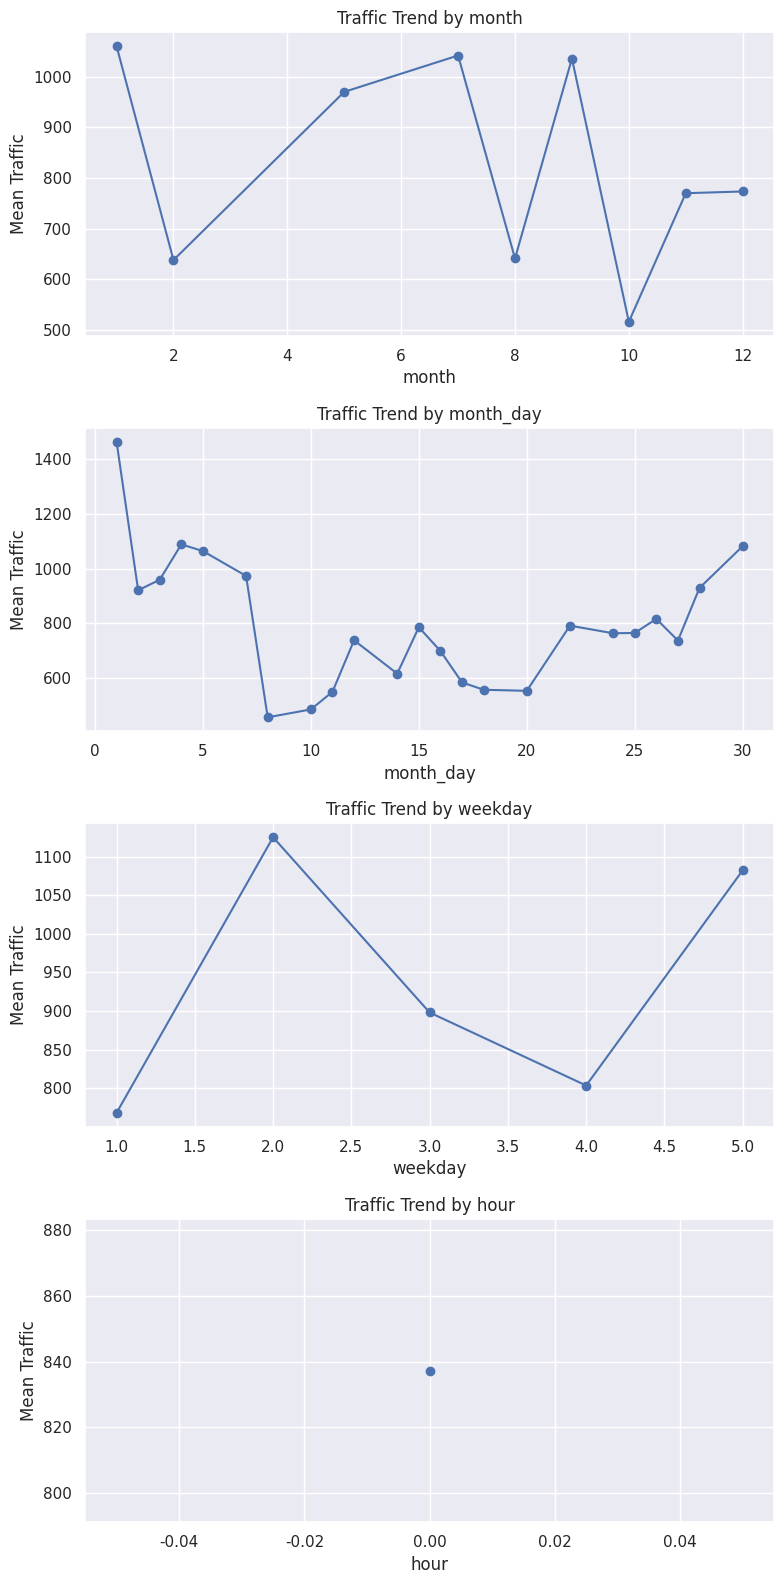

In [28]:
metrics = ['month', 'month_day', 'weekday', 'hour']
fig = plt.figure(figsize=(8, 4*len(metrics)))
for i, metric in enumerate(metrics):
	ax = fig.add_subplot(len(metrics), 1, i+1)
	ax.plot(data.groupby(metric)['traffic_volume'].mean(), '-o')
	ax.set_xlabel(metric)
	ax.set_ylabel("Mean Traffic")
	ax.set_title(f"Traffic Trend by {metric}")
plt.tight_layout()
plt.show()

#Train the Model

In [29]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X, y)
new = []
print('predicted output :=',regr.predict(X[:10]))
print('Actual output :=',y[:10])

predicted output := [0.46867751 0.32721442 0.32882021 0.08950346 0.88841783 0.08950346
 0.60376792 0.11203488 0.55881028 0.26169526]
Actual output := [0.51512287 0.3241966  0.3289225  0.09546314 0.88846881 0.09546314
 0.62381853 0.11058601 0.57561437 0.26181474]


In [30]:
import joblib

joblib.dump(regr, 'regr_model.pkl')


['regr_model.pkl']

In [31]:
# error eval
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
y_pred = regr.predict(testX)
print('Mean Absolute Error:', mean_absolute_error(testY, y_pred))
##############################

Mean Absolute Error: 0.009322088515677564


In [32]:
print(features)

['is_holiday', 'temperature', 'weekday', 'hour', 'month_day', 'year', 'month', 'weather_type', 'weather_description']


In [33]:
data[features].head(5)

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,288.12,1,0,12,2012,11,3,5
1,1,270.62,1,0,2,2017,1,4,4
2,1,264.40,2,0,25,2012,12,2,10
3,1,258.96,1,0,18,2013,2,2,2
4,1,250.14,3,0,1,2014,1,2,10


#User input

In [34]:
ip=[0,89,2,288.28,1,9,2,2012,10]
ip = x_scaler.transform([ip])
out=regr.predict(ip)
print('Before inverse Scaling :',out)

Before inverse Scaling : [632.81783362]


In [35]:
y_pred = y_scaler.inverse_transform([out])
print('Traffic Volume : ',y_pred)

Traffic Volume :  [[669976.26797413]]


In [36]:
if(y_pred<=1000):
  print("No Traffic ")
elif y_pred>1000 and y_pred<=3000:
  print("Busy or Normal Traffic")
elif y_pred>3000 and y_pred<=5500:
  print("heavy Traffic")
else:
  print("Worst case")

Worst case


#Evaluating Metrics 

In [37]:
# def relative_absolute_error(true, pred):
#     true_mean = np.mean(true)
#     squared_error_num = np.sum(np.abs(true - pred))
#     squared_error_den = np.sum(np.abs(true - true_mean))
#     rae_loss = squared_error_num / squared_error_den
#     return rae_loss
# def mean_bias_error(true, pred):
#     bias_error = true - pred
#     mbe_loss = np.mean(np.sum(diff) / true.size)
#     return mbe_loss
# def mean_absolute_percentage_error(true, pred):
#     abs_error = (np.abs(true - pred)) / true
#     sum_abs_error = np.sum(abs_error)
#     mape_loss = (sum_abs_error / true.size) * 100
#     return mape_loss
# def mean_squared_error(true, pred):
#     squared_error = np.square(true - pred) 
#     sum_squared_error = np.sum(squared_error)
#     mse_loss = sum_squared_error / true.size
#     return mse_loss
# def root_mean_squared_error(true, pred):
#     squared_error = np.square(true - pred) 
#     sum_squared_error = np.sum(squared_error)
#     rmse_loss = np.sqrt(sum_squared_error / true.size)
#     return rmse_loss